In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve

In [90]:
data = pd.read_csv("bank-additional-full.csv",sep=';')
data = data.drop('duration',axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


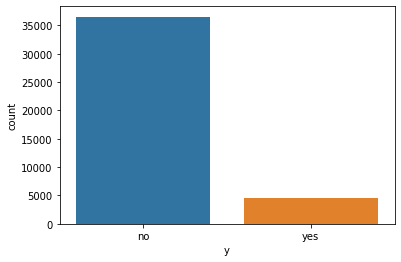

In [91]:
sns.countplot(x='y',data=data)

In [92]:
#converting y to yes to balance the imblance dataset
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

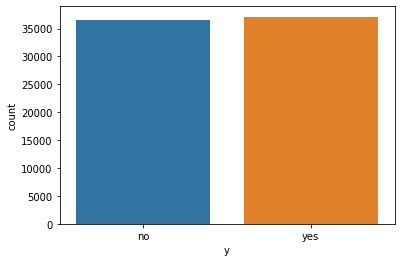

In [93]:
sns.countplot(x='y',data=data)

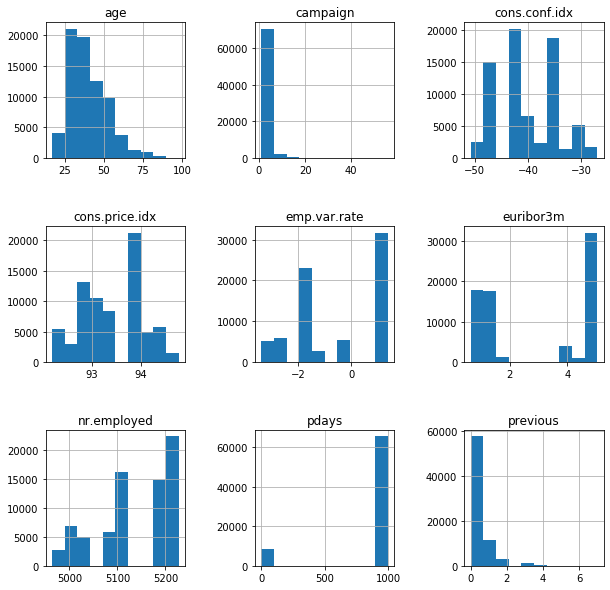

In [94]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [95]:

#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [96]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2'],
      dtype='object')

# Standardizing the data

In [97]:
##Standardizing the data
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [98]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0


# converting ordinal and nominal values to binary numbers

In [99]:
#ordinal variables
data['poutcome'] = data['poutcome'].map({'failure': 1,'nonexistent': 2,'success': 3})
data['default'] = data['default'].map({'yes': 1,'unknown': 2,'no': 3})
data['housing'] = data['housing'].map({'yes': 1,'unknown': 2,'no': 3})
data['loan'] = data['loan'].map({'yes': 1,'unknown': 2,'no': 3})

In [102]:
#nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
data = pd.get_dummies(data,columns=nominal)
data['y']=data['y'].map({'yes': 1,'no': 0})
data.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,3,3,3,0.0,1.0,0.0,2,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,2,3,3,0.0,1.0,0.0,2,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,3,1,3,0.0,1.0,0.0,2,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,3,3,3,0.0,1.0,0.0,2,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,3,3,1,0.0,1.0,0.0,2,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


In [108]:
data.columns


Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

# dividing the data into train and test

In [104]:
X = data.drop('y', axis=1).values
y = data['y'].values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# logistic model 

In [111]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
y_test_predict = logisticRegr.predict(X_test)

In [114]:
accuracy = metrics.accuracy_score(y_test_predict, y_test)
precision = metrics.precision_score(y_test_predict,y_test)
recall = metrics.recall_score(y_test_predict,y_test)
f1_score = metrics.f1_score(y_test_predict,y_test)

In [115]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [accuracy, precision, recall, f1_score]})

In [116]:
table

,Metric,Logistic Regression with Linear Features
0,Accuracy,0.743451
1,Precision,0.642632
2,Recall,0.806364
3,F1 Score,0.715247


# Model evaluation after appliying PCA

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
x_pca = pca.fit_transform(X)
x_pca.shape

(73668, 24)

Observation : To capture 90% of variance we need only 24 Features out of 56

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)

In [119]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_test_predict = logisticRegr.predict(X_test)
accuracy = metrics.accuracy_score(y_test_predict, y_test)
precision = metrics.precision_score(y_test_predict,y_test)
recall = metrics.recall_score(y_test_predict,y_test)
f1_score = metrics.f1_score(y_test_predict,y_test)

In [120]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [accuracy, precision, recall, f1_score]})

In [121]:
table

,Metric,Logistic Regression with Linear Features
0,Accuracy,0.734492
1,Precision,0.655085
2,Recall,0.780118
3,F1 Score,0.712155


# Plotting the ROC Curve

In [125]:
#data['predict'] = predict
TP = np.sum([(c==1 and p==1) for c,p in zip(y_test,y_test_predict)])
TN = np.sum([(c==0 and p==0) for c,p in zip(y_test,y_test_predict)])
FP = np.sum([(c==0 and p==1) for c,p in zip(y_test,y_test_predict)])
FN = np.sum([(c==1 and p==0) for c,p in zip(y_test,y_test_predict)])
P = np.sum(y_test)
N = len(y_test) - P
phat = logisticRegr.predict_proba(X_test)[:,1]

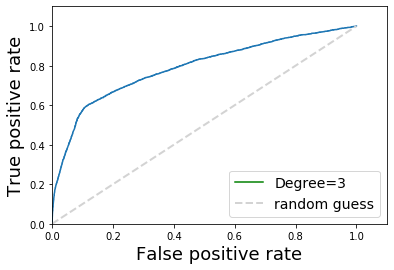

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, phat3)
plt.plot(fpr, tpr)
plt.plot(FP/N, TP/P, label = 'Degree=3', color='green')

x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()